## Import the Libraries & Data

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
#Significant (Magnitude > 5.5) Earthquake data from 1965 to 2015.
#Licence: CC0 - Public Domain
#https://www.kaggle.com/datasets/usgs/earthquake-database

earthquakes = pd.read_csv('data/kaggle_significant_earthquakes_database.csv')

In [3]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

## Data Preparation

In [4]:
def magnitude_classification(dataframe: pd.DataFrame):
    """
    Classify earthquakes based on magnitude.

    Parameters
    ----------
    dataframe : pd.DataFrame
        Dataframe containing earthquake data

    Returns
    -------
    str
        Returns the classification of the earthquake as a string.
    """
    if dataframe['Magnitude'] >= 5.0 and dataframe['Magnitude'] <= 5.9:
        return 'Moderate (5.0-5.9)'
    elif dataframe['Magnitude'] >= 6.0 and dataframe['Magnitude'] <= 6.9:
        return 'Strong (6.0-6.9)'
    elif dataframe['Magnitude'] >= 7.0 and dataframe['Magnitude'] <= 7.9:
        return 'Major (7.0-7.9)'
    elif dataframe['Magnitude'] >= 8.0:
        return 'Great (>8.0)'

In [5]:
earthquakes['Class'] = earthquakes.apply(magnitude_classification, axis=1)

In [6]:
earthquakes

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed,year,month,Class
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02,1965,1965,Strong (6.0-6.9)
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04,1965,1965,Moderate (5.0-5.9)
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05,1965,1965,Strong (6.0-6.9)
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08,1965,1965,Moderate (5.0-5.9)
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09,1965,1965,Moderate (5.0-5.9)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28,2016,2016,Moderate (5.0-5.9)
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28,2016,2016,Moderate (5.0-5.9)
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28,2016,2016,Moderate (5.0-5.9)
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29,2016,2016,Strong (6.0-6.9)


### Creating a Plot

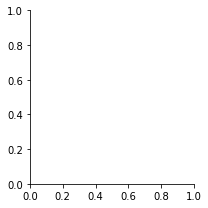

In [7]:
g = sns.FacetGrid(earthquakes)

## Scatter Plots in FacetGrid

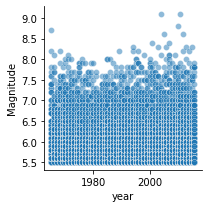

In [8]:
g = sns.FacetGrid(earthquakes)
g.map(sns.scatterplot, 'year', 'Magnitude', alpha=0.5);

### Adding Columns to the FacetGrid

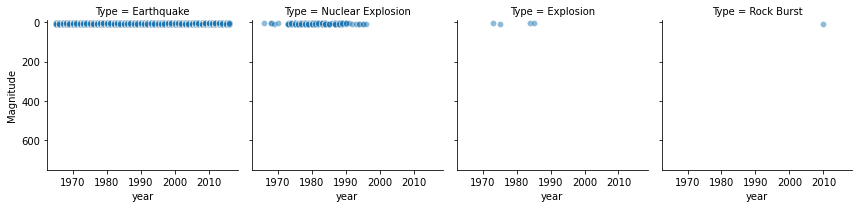

In [9]:
g = sns.FacetGrid(earthquakes, col='Type')
g.map(sns.scatterplot, 'year', 'Magnitude', alpha=0.5)
g.set(ylim=(750, -10));

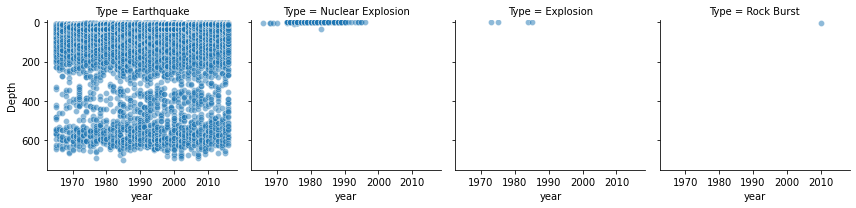

In [10]:
g = sns.FacetGrid(earthquakes, col='Type')
g.map(sns.scatterplot, 'year', 'Depth', alpha=0.5)
g.set(ylim=(750, -10));

### Adding Columns and Rows to the FacetGrid

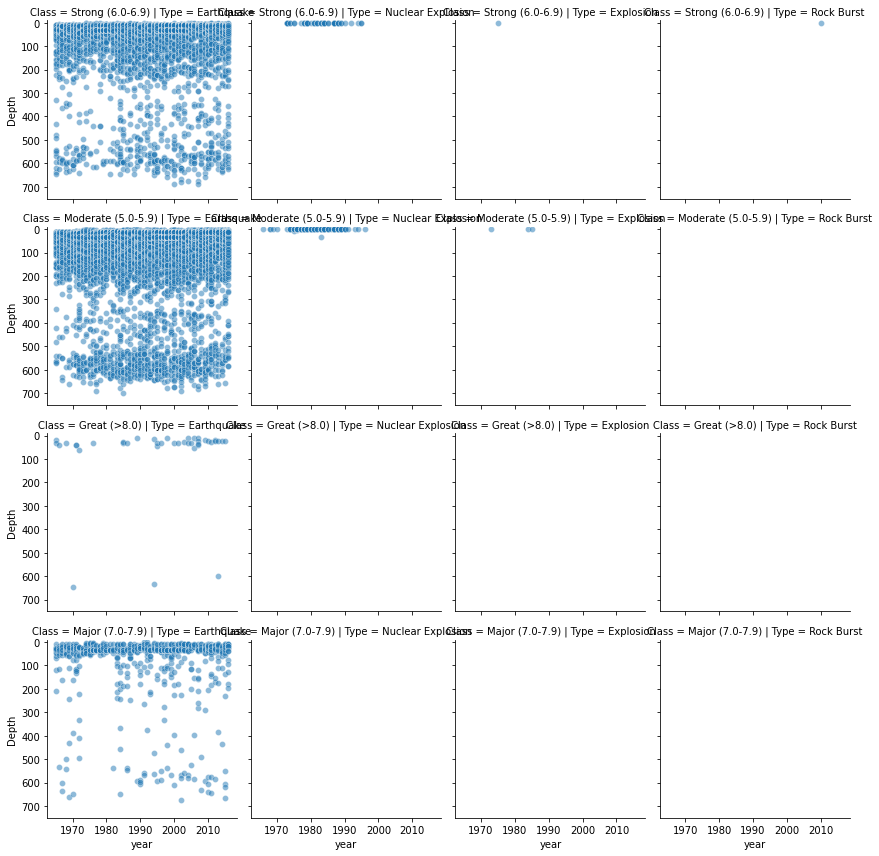

In [11]:
g = sns.FacetGrid(earthquakes, col='Type', row='Class')
g.map(sns.scatterplot, 'year', 'Depth', alpha=0.5)
g.set(ylim=(750, -10));

### Cleaning Up Subplot Titles

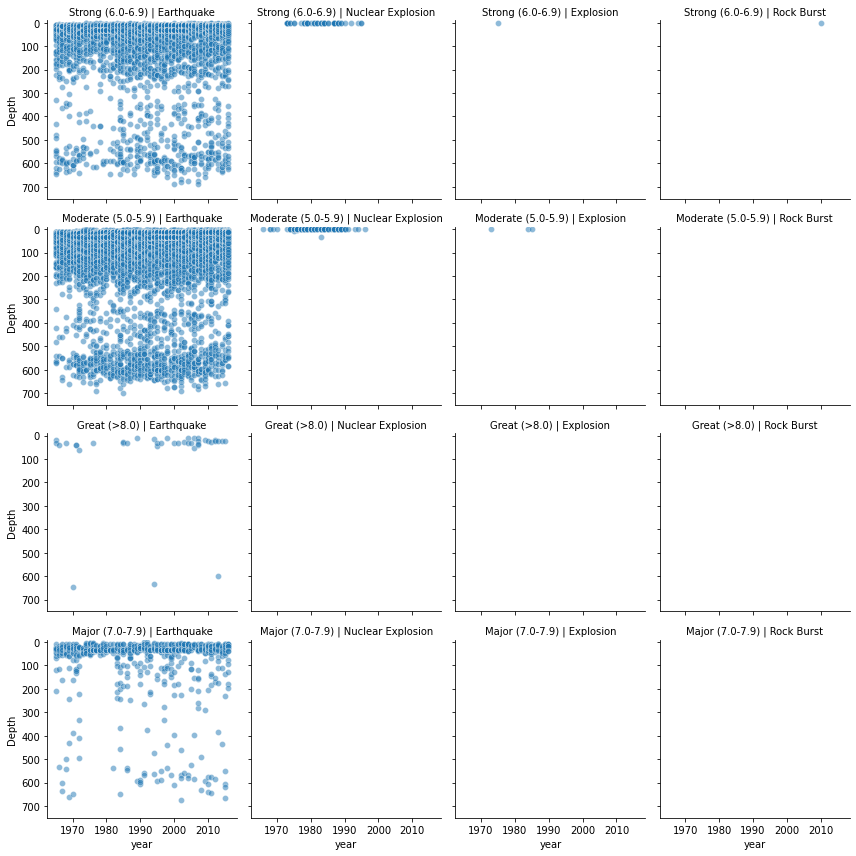

In [12]:
g = sns.FacetGrid(earthquakes, col='Type', row='Class')
g.map(sns.scatterplot, 'year', 'Depth', alpha=0.5)
g.set_titles(col_template = '{col_name}', row_template='{row_name}')
g.set(ylim=(750, -10));

### Ordering the Subplots in FacetGrid

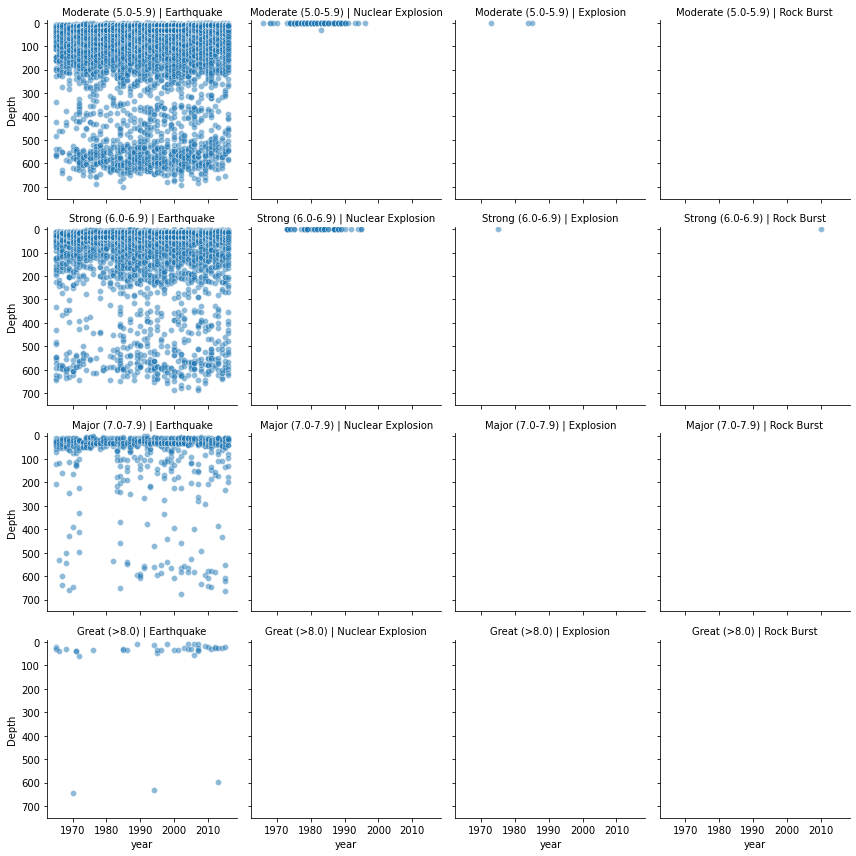

In [13]:
g = sns.FacetGrid(earthquakes, col='Type', row='Class', 
                  row_order=['Moderate (5.0-5.9)','Strong (6.0-6.9)',  'Major (7.0-7.9)', 'Great (>8.0)',])
g.map(sns.scatterplot, 'year', 'Depth', alpha=0.5)
g.set_titles(col_template = '{col_name}', row_template='{row_name}')
g.set(ylim=(750, -10));

### Histograms in FacetGrid

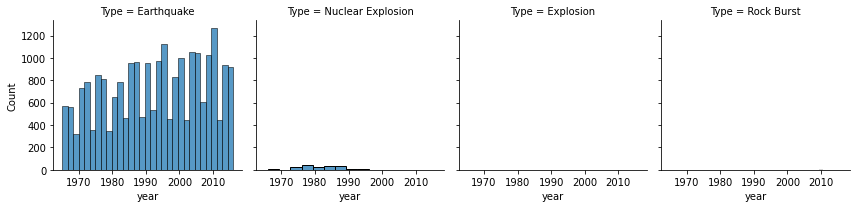

In [14]:
g = sns.FacetGrid(earthquakes, col='Type')
g.map(sns.histplot, 'year');

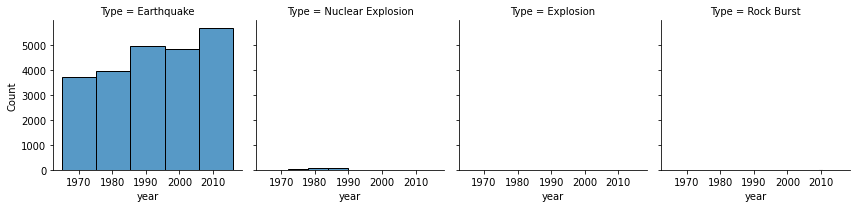

In [15]:
g = sns.FacetGrid(earthquakes, col='Type')
g.map(sns.histplot, 'year', bins=5);

### Boxplots in FacetGrid

/Users/andy/.pyenv/versions/3.10.3/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


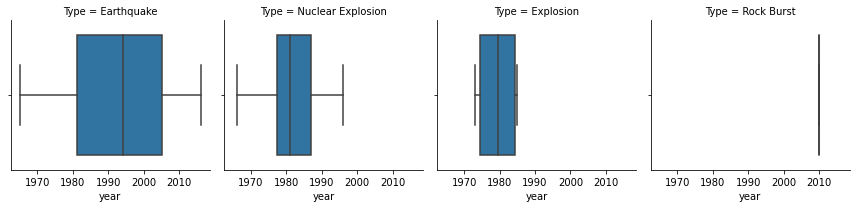

In [16]:
g = sns.FacetGrid(earthquakes, col='Type')
g.map(sns.boxplot, 'year');